# DATA

In [71]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

In [73]:
!pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

## load data & dropna

In [74]:
# Read salary data
file_path = Path("Resources/Stroke_dataset.csv")
df_stroke = pd.read_csv(file_path)

# Display sample data
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [75]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [76]:
df_stroke["bmi"].isnull

<bound method Series.isnull of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64>

In [77]:
df_stroke_cleaned = df_stroke.dropna(subset=['bmi'])
df_stroke_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


## preprocess categorical data

In [78]:
X = df_stroke_cleaned.drop(columns=['stroke'], inplace=False)
y = df_stroke_cleaned['stroke']

In [79]:
X = pd.get_dummies(X)
X.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,31112,80.0,0,1,105.92,32.5,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5,56669,81.0,0,0,186.21,29.0,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False


## train test split via sklearn

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.15,
                                                    random_state=42,
                                                    stratify=y)

In [116]:
# Undersample (select)
#undersampler = RandomUnderSampler(random_state=42)
#X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [118]:
# Oversample (select)
#SMOTE
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [119]:
import numpy as np

unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class Distribution After Resample:", dict(zip(unique, counts)))


Class Distribution After Resample: {0: 3994, 1: 3994}


In [120]:
X_train.shape

(4172, 22)

In [121]:
X_test.shape

(737, 22)

In [122]:
X_train_resampled.shape

(7988, 22)

In [123]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train_resampled)

# Scale the training data
X_train_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

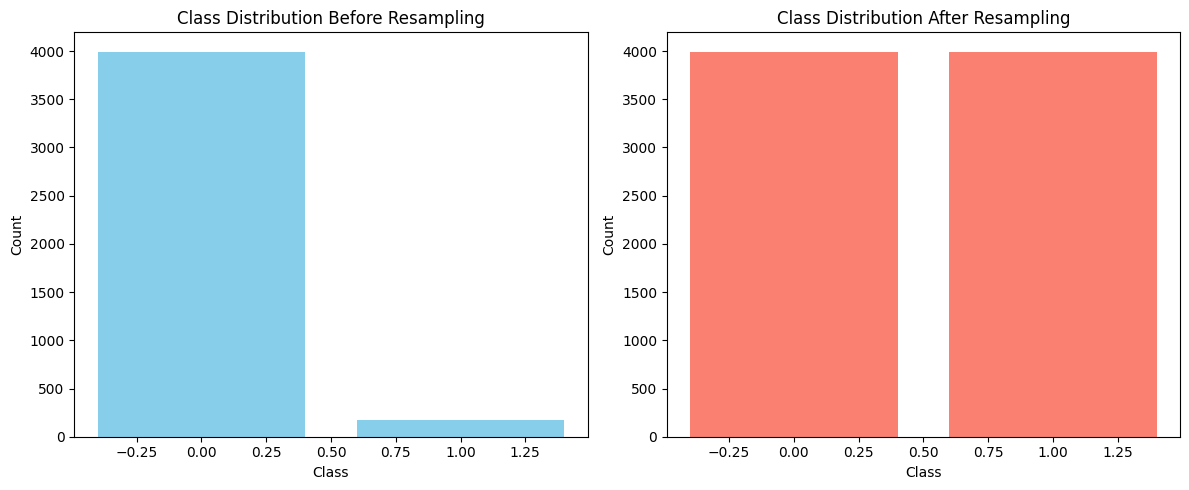

In [124]:
#Smote
import matplotlib.pyplot as plt
from collections import Counter

# Original class distribution
original_class_distribution = Counter(y_train)

# Resampled class distribution
resampled_class_distribution = Counter(y_train_resampled)

# Plotting class distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before resampling
ax[0].bar(original_class_distribution.keys(), original_class_distribution.values(), color='skyblue')
ax[0].set_title('Class Distribution Before Resampling')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

# After resampling
ax[1].bar(resampled_class_distribution.keys(), resampled_class_distribution.values(), color='salmon')
ax[1].set_title('Class Distribution After Resampling')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


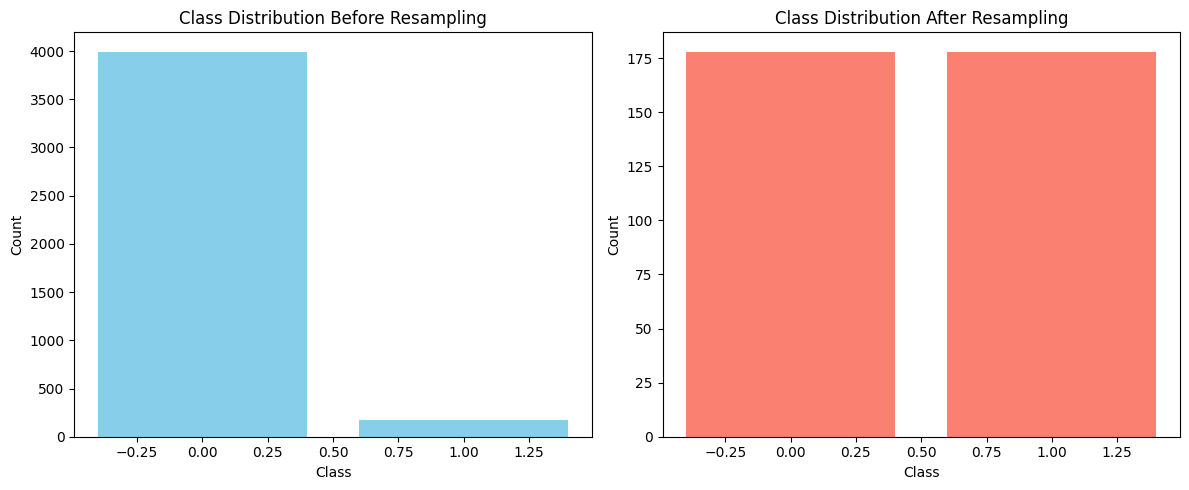

In [117]:
#undersampling

import matplotlib.pyplot as plt
from collections import Counter

# Original class distribution
original_class_distribution = Counter(y_train)

# Resampled class distribution
resampled_class_distribution = Counter(y_train_resampled)

# Plotting class distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before resampling
ax[0].bar(original_class_distribution.keys(), original_class_distribution.values(), color='skyblue')
ax[0].set_title('Class Distribution Before Resampling')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

# After resampling
ax[1].bar(resampled_class_distribution.keys(), resampled_class_distribution.values(), color='salmon')
ax[1].set_title('Class Distribution After Resampling')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# MODELS

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Decsion Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import seaborn as sns
# DNN
!pip install tensorflow keras-tuner scikit-learn
import tensorflow as tf
import keras_tuner as kt

from sklearn.metrics import confusion_matrix,classification_report, r2_score, accuracy_score


ModuleNotFoundError: No module named 'keras_tuner'

In [107]:
!pip install tensorflow keras-tuner scikit-learn
import tensorflow as tf
import keras_tuner as kt

from sklearn.metrics import confusion_matrix,classification_report, r2_score, accuracy_score


## logistic regression

In [ ]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [ ]:
# Train the data
classifier.fit(X_train_scaled, y_train_resampled)

LogisticRegression(random_state=1)

In [ ]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8173537871524449
Testing Data Score: 0.824966078697422


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Prediction,Actual
4646,0,0
829,0,0
3191,0,0
3199,0,0
495,0,0
...,...,...
3746,0,0
3515,0,0
3510,0,0
2291,0,0


In [ ]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.824966078697422

In [ ]:
# Print confusion matrix
log_cm = confusion_matrix(predictions, y_test)

log_cm_df = pd.DataFrame(log_cm, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"])

log_cm_df

,Predicted 0,Predicted 1
Actual 0,602,25
Actual 1,104,6


In [ ]:
# Print classification report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       627
           1       0.19      0.05      0.09       110

    accuracy                           0.82       737
   macro avg       0.52      0.51      0.49       737
weighted avg       0.75      0.82      0.78       737



## knn

In [ ]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[479,  10],
       [227,  21]])

In [ ]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80       489
           1       0.68      0.08      0.15       248

    accuracy                           0.68       737
   macro avg       0.68      0.53      0.48       737
weighted avg       0.68      0.68      0.58       737



## decision tree

In [ ]:
# Step 6: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limit depth to avoid overfitting
clf.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       706
           1       0.00      0.00      0.00        31

    accuracy                           0.96       737
   macro avg       0.48      0.50      0.49       737
weighted avg       0.92      0.96      0.94       737



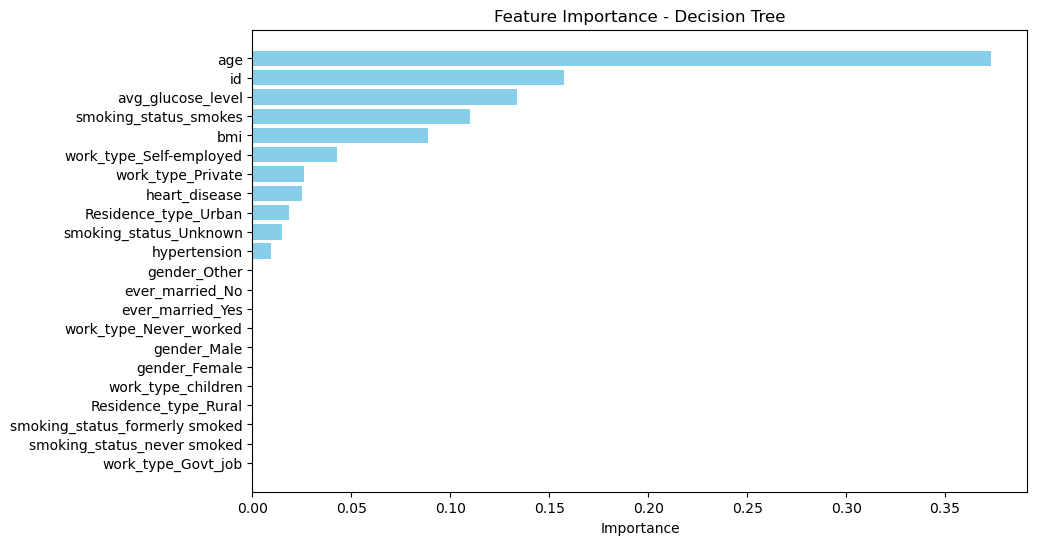

In [ ]:
# Extract feature importance from the Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.show()

## random forest

In [ ]:
# Step 6: Train a Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=10,        # Maximum depth of each tree
    random_state=42,
    class_weight="balanced"  # Address class imbalance
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
# Step 7: Evaluate the model
y_pred = rf_clf.predict(X_test)
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       706
           1       0.10      0.10      0.10        31

    accuracy                           0.93       737
   macro avg       0.53      0.53      0.53       737
weighted avg       0.92      0.93      0.93       737



In [ ]:
# Extract feature importance from the Random Forest model
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

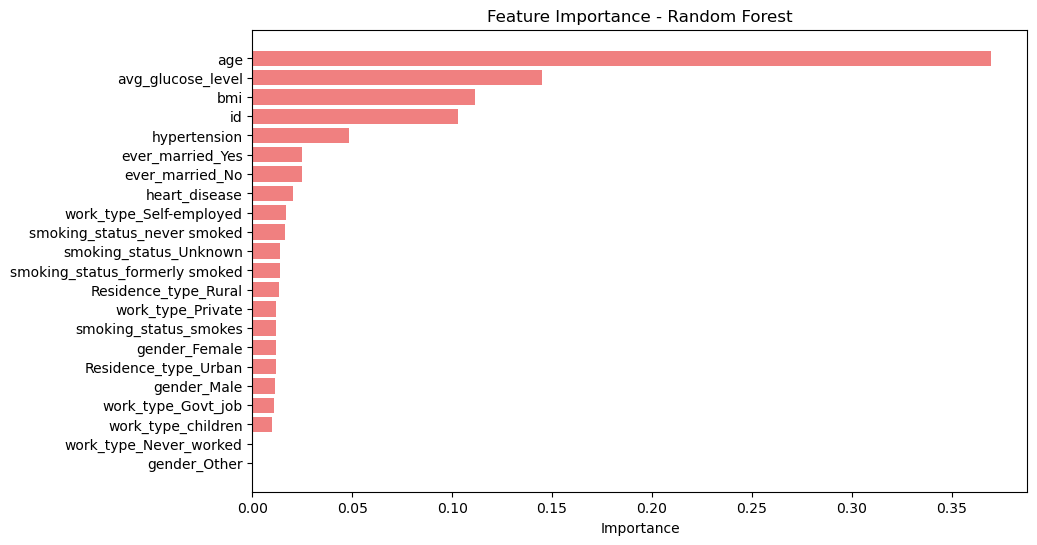

In [ ]:
# Plot the feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

## naive bayes

In [ ]:
# 3. Build the Naive Bayes Model
model = GaussianNB()
model.fit(X_train_scaled, y_train_resampled)

GaussianNB()

In [ ]:
# 4. Evaluate the Model
y_pred = model.predict(X_test_scaled)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 59.57%
R-squared: -9.03
Confusion Matrix:
[[414 292]
 [  6  25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       706
           1       0.08      0.81      0.14        31

    accuracy                           0.60       737
   macro avg       0.53      0.70      0.44       737
weighted avg       0.95      0.60      0.71       737



In [ ]:
# 5. Model Optimization - Hyperparameter Tuning

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_resampled)

# Best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrain the model with best parameters
optimized_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
optimized_model.fit(X_train_scaled, y_train_resampled)

# Evaluate the optimized model
y_pred_optimized = optimized_model.predict(X_test_scaled)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {optimized_accuracy * 100:.2f}%")

# Final R-squared score for optimized model
optimized_r2 = r2_score(y_test, y_pred_optimized)
print(f"Optimized R-squared: {optimized_r2:.2f}")

Best Hyperparameters: {'var_smoothing': 1e-06}
Optimized Accuracy: 59.57%
Optimized R-squared: -9.03


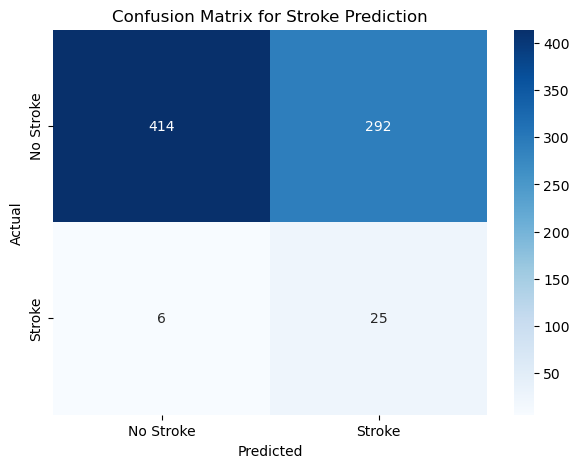

In [ ]:
# 6. Model Performance Visualization (Confusion Matrix)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stroke Prediction')
plt.show()

In [ ]:
# 7. Save the results in CSV (for iterative tracking of optimization)
results = {
    'Model': ['Initial', 'Optimized'],
    'Accuracy': [accuracy, optimized_accuracy],
    'R-squared': [r2, optimized_r2],
    'Best var_smoothing': [None, best_params['var_smoothing']]
}
results_df = pd.DataFrame(results)
results_df.to_csv("model_optimization_results.csv", index=False)

In [ ]:
# Final model performance output
print("Final Model Performance:")
print(results_df)

Final Model Performance:
       Model  Accuracy  R-squared  Best var_smoothing
0    Initial  0.595658     -9.035                 NaN
1  Optimized  0.595658     -9.035            0.000001


## Deep Neural Network

In [125]:

# Define the model creation function
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])

    # Allow kerastuner to decide number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(
        units=hp.Int('first_units', min_value=1, max_value=12, step=2),
        activation=activation,
        input_dim=22
    ))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=1, max_value=10, step=2),
            activation=activation
        ))

    # Add output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

# Instantiate the tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    directory="my_dir",
    project_name="tune_model"
)

# Run the kerastuner search for best hyperparameters
fit_model=tuner.search(X_train_scaled, y_train_resampled, epochs=20, validation_data=(X_test_scaled, y_test))

# Display the search results
tuner.results_summary()

Reloading Tuner from my_dir/tune_model/tuner0.json
Results summary
Results in my_dir/tune_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0006 summary
Hyperparameters:
activation: sigmoid
first_units: 5
num_layers: 1
units_0: 3
units_1: 7
units_2: 7
units_3: 9
units_4: 1
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9579375982284546

Trial 0012 summary
Hyperparameters:
activation: sigmoid
first_units: 7
num_layers: 1
units_0: 7
units_1: 1
units_2: 7
units_3: 5
units_4: 1
tuner/epochs: 7
tuner/initial_epoch: 3
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0004
units_5: 3
Score: 0.9579375982284546

Trial 0031 summary
Hyperparameters:
activation: sigmoid
first_units: 7
num_layers: 5
units_0: 7
units_1: 7
units_2: 1
units_3: 7
units_4: 9
units_5: 9
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9579375982284546

Trial 0041 summary
Hyperparameters:
activation: relu
first_units: 11
num_la

In [126]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 5,
 'num_layers': 1,
 'units_0': 3,
 'units_1': 7,
 'units_2': 7,
 'units_3': 9,
 'units_4': 1,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [127]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


24/24 - 0s - 13ms/step - accuracy: 0.9579 - loss: 0.3033
Loss: 0.30326101183891296, Accuracy: 0.9579375982284546


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4955 - loss: 0.8193 - val_accuracy: 0.9579 - val_loss: 0.5006
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5023 - loss: 0.6738 - val_accuracy: 0.9579 - val_loss: 0.5317
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8272 - loss: 0.5899 - val_accuracy: 0.9471 - val_loss: 0.4455
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9185 - loss: 0.4723 - val_accuracy: 0.9498 - val_loss: 0.3530
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9372 - loss: 0.3695 - val_accuracy: 0.9552 - val_loss: 0.2947
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9506 - loss: 0.2926 - val_accuracy: 0.9525 - val_loss: 0.2556
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9552 - loss: 0.2479 - val_accuracy: 0.9525 - val_loss: 0.2273
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9602 - loss: 0.2095 - val_accuracy: 0.

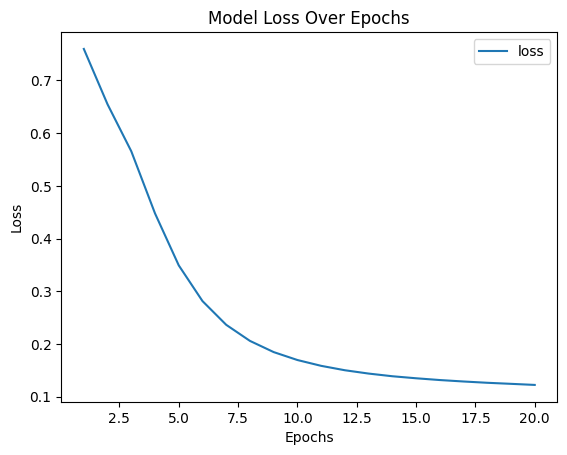

In [128]:
#Smote
# Train the best model
history = best_model.fit(X_train_scaled, y_train_resampled,
                         validation_data=(X_test_scaled, y_test),
                         epochs=20)

# Convert the training history into a DataFrame
history_df = pd.DataFrame(history.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss", title="Model Loss Over Epochs", xlabel="Epochs", ylabel="Loss")
plt.show()

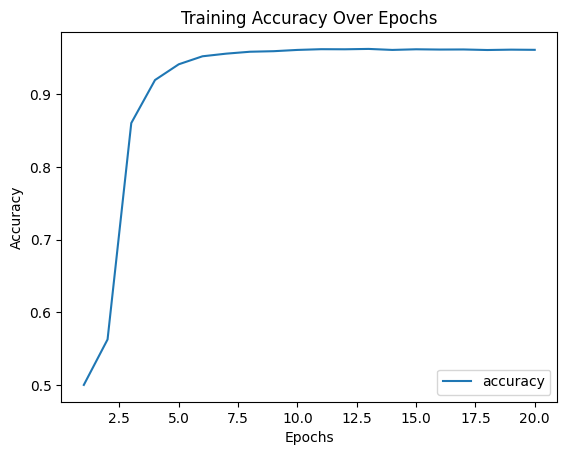

In [129]:
#Smote
history_df.plot(y="accuracy", title="Training Accuracy Over Epochs", xlabel="Epochs", ylabel="Accuracy")
plt.show()

In [133]:
#SMOTE
predictions = best_model.predict(X_test_scaled)

# Convert predictions to binary or class labels (depending on your model output)
# Assuming a binary classification model with a sigmoid activation
predicted_classes = (predictions > 0.5).astype(int)



# Generate a classification report
target_names = ["No Stroke", "Stroke"]
print(classification_report(y_test, predicted_classes, target_names=target_names))
target_names = ["No Stroke", "Stroke"]
report_dict = classification_report(y_test, predicted_classes, target_names=target_names, output_dict=True)
# Convert the report dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame (for your presentation file)
print(report_df)
report_df = report_df.round(2)

# Save the table to a CSV or Excel file for use in your presentation
report_df.to_csv('classification_report.csv')

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

   No Stroke       0.96      0.99      0.98       706
      Stroke       0.29      0.06      0.11        31

    accuracy                           0.95       737
   macro avg       0.62      0.53      0.54       737
weighted avg       0.93      0.95      0.94       737

              precision    recall  f1-score     support
No Stroke      0.960274  0.992918  0.976323  706.000000
Stroke         0.285714  0.064516  0.105263   31.000000
accuracy       0.953867  0.953867  0.953867    0.953867
macro avg      0.622994  0.528717  0.540793  737.000000
weighted avg   0.931900  0.953867  0.939684  737.000000


In [100]:
#undersampling
predictions = best_model.predict(X_test_scaled)

# Convert predictions to binary or class labels (depending on your model output)
# Assuming a binary classification model with a sigmoid activation
predicted_classes = (predictions > 0.5).astype(int)



# Generate a classification report
target_names = ["No Stroke", "Stroke"]
print(classification_report(y_test, predicted_classes, target_names=target_names))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

   No Stroke       0.96      1.00      0.98       706
      Stroke       0.00      0.00      0.00        31

    accuracy                           0.96       737
   macro avg       0.48      0.50      0.49       737
weighted avg       0.92      0.96      0.94       737



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)  # Ensure `predicted_classes` are processed as per the earlier snippet

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predicted_classes)
print(f"Accuracy Score: {acc_score:.2f}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          701            5
Actual 1           29            2
Accuracy Score: 0.95
